In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import scipy.stats as ss
style.use("seaborn")
%matplotlib inline

from IPython.display import display
# from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# import bqplot.pyplot as bq

import warnings
warnings.filterwarnings("ignore")


# Distribución Normal

In [5]:
def ran_dist(x_med=0, 
             x_desv=1,
             x_n=100):
    plt.figure(figsize=(14,8))
    plt.axvline(x=x_med, linestyle="--", linewidth=2.5, alpha=.75)
    plt.axvline(x=x_med-3*x_desv, linestyle=":", alpha=.5)
    plt.axvline(x=x_med-2*x_desv, linestyle=":", alpha=.5)
    plt.axvline(x=x_med-1*x_desv, linestyle=":", alpha=.5)
    plt.axvline(x=x_med+1*x_desv, linestyle=":", alpha=.5)
    plt.axvline(x=x_med+2*x_desv, linestyle=":", alpha=.5)
    plt.axvline(x=x_med+3*x_desv, linestyle=":", alpha=.5)
    
    x_rand = np.random.normal(x_med,x_desv,x_n)
    values, bins, _ = plt.hist(x_rand, density=False, alpha=0.4, edgecolor="k")#edgecolor , linewidth=2
    area = sum(np.diff(bins) * values)
    x_line = np.linspace(x_med+4*x_desv,
                         x_med-4*x_desv,
                         100)
    y_line=ss.norm.pdf(x_line, x_med, x_desv)*area
    plt.plot(x_line, y_line, '--', linewidth=2.5)
    title_tmpl = 'Distribución Normal (Promedio = {} Desviación estándar = {})'
    plt.title(title_tmpl.format(x_med, x_desv))
    plt.show()

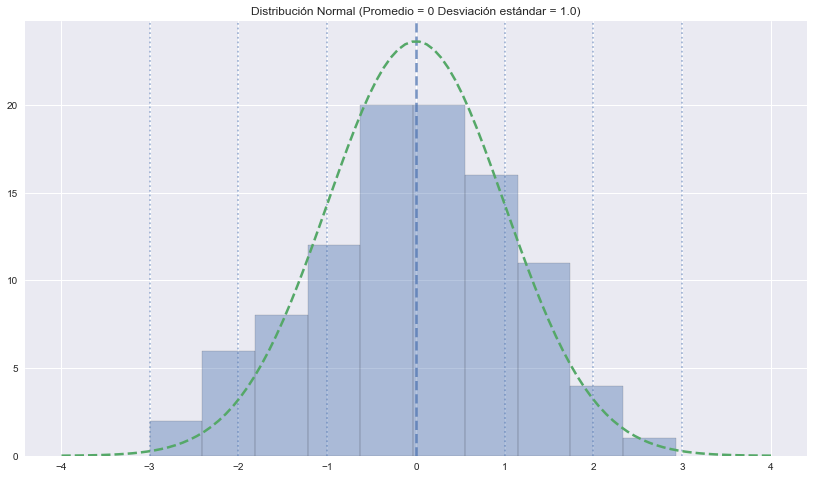

In [6]:
x_med = widgets.IntSlider(value=0,
                          min=-150,
                          max=150,
                          description='Promedio')
x_desv = widgets.FloatSlider(value=1,
                             min=1,
                             max=50,
                             step=.1,
                             description='Desv Estándar',
                             readout_format='.1f')
x_n = widgets.IntSlider(value=100,
                        min=2,
                        max=1500,
                        description='Tamaño muest')

out = widgets.interactive_output(ran_dist, {'x_med': x_med, 'x_desv': x_desv, 'x_n': x_n})

widgets.VBox([out,widgets.HBox([x_med, x_desv, x_n])])


In [4]:
# interact_randist = interactive(ran_dist, x_med=(5,150), x_desv=(1,50,.5), x_n=(2,1500))
# interact_randist